# Experiment Tracking Using MLFlow


## Dataset  Details

1. Title : Diamonds Dataset

2. the 7th column "price" is the values to be predicted.

3. Data Type : Mixed ( Numerical + Categorical)
	
4. Dataset has nearly 54000 instances.

5. It has 10 features.

6. Features 

	price : price in US dollars (\$326--\$18,823)

	carat : weight of the diamond (0.2--5.01)

	cut   : quality of the cut (Fair, Good, Very Good, Premium, Ideal)

	color : diamond colour, from J (worst) to D (best)

	clarity : a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

	x : length in mm (0--10.74)

	y : width in mm (0--58.9)

	z : depth in mm (0--31.8)

	depth : total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

	table : width of top of diamond relative to widest point (43--95)

## Importing Neccessary Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## loading dataset

In [2]:
data=pd.read_csv('data/diamonds.csv')
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
data.shape

(53940, 10)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [6]:
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## Re-arranging the columns

In [8]:
data=data[['carat','cut','color','clarity','depth','table','x','y','z','price']]

# Pairplot

<Figure size 2160x1440 with 0 Axes>

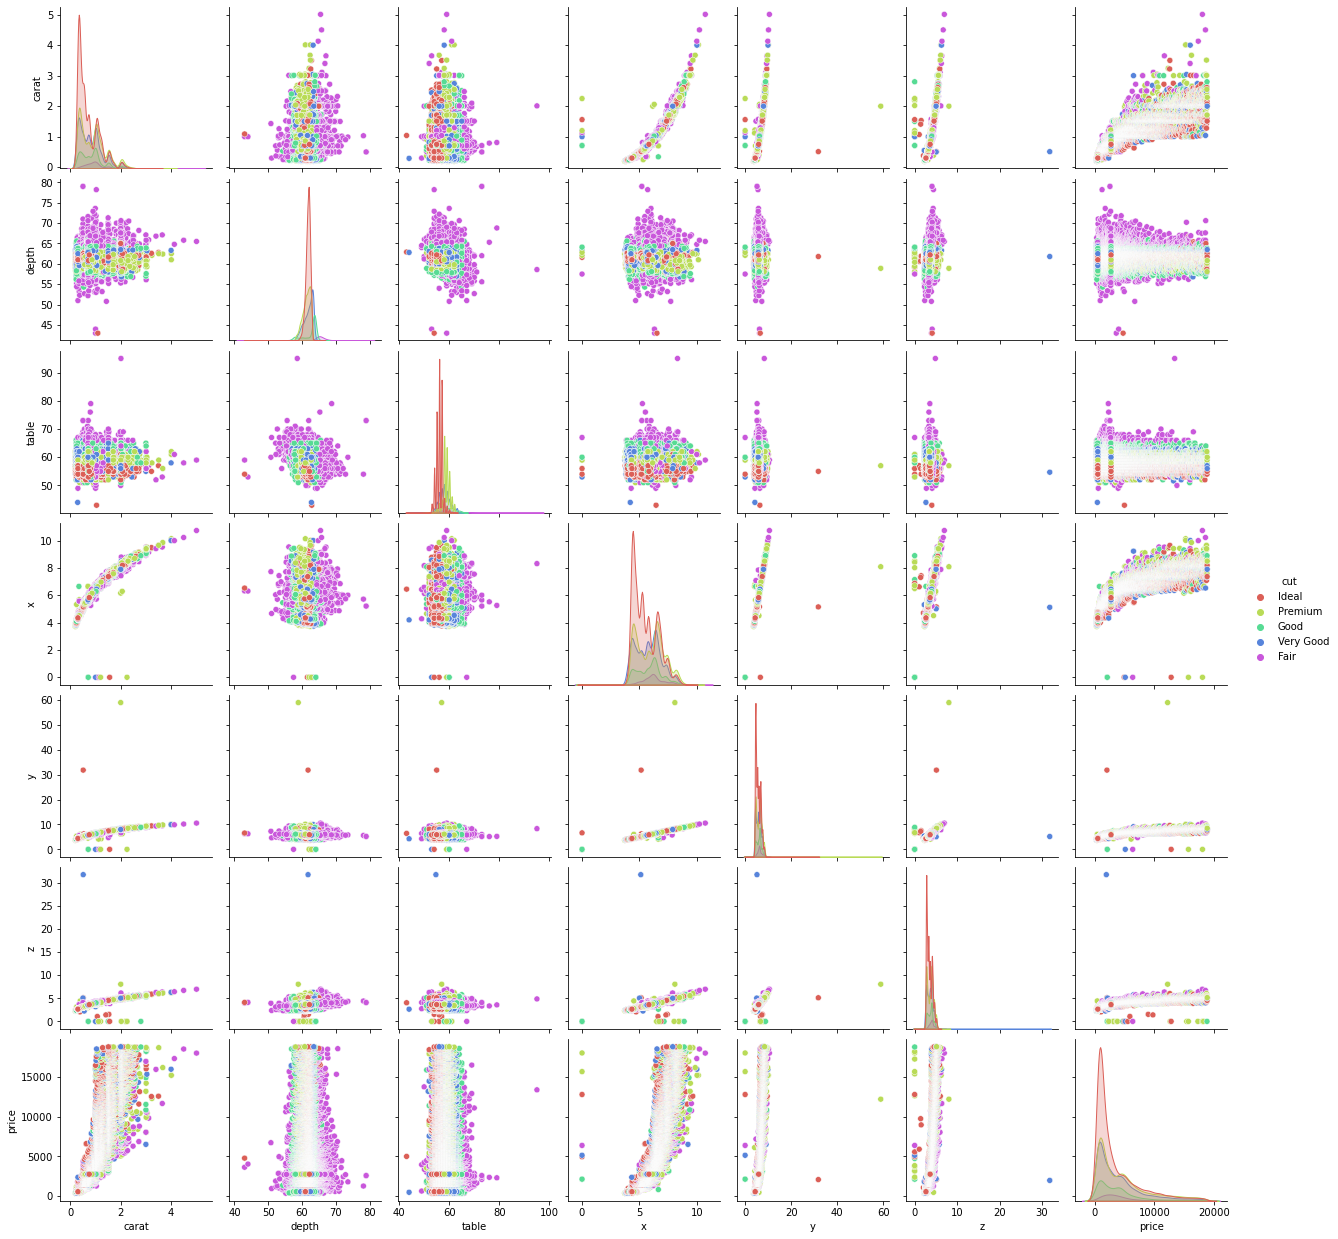

In [14]:
plt.figure(figsize=(30,20))
sns.pairplot(data,hue='cut', palette='hls')
plt.show()

### Separating the features and target values

In [15]:
X=data.drop(['price'],axis=1)
y=data['price']

## Train-Test-Split

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=100)

In [18]:
X_train_cat = X_train.select_dtypes(include=['object'])

X_train_cat.head()

,cut,color,clarity
33169,Ideal,D,VS1
53170,Premium,E,SI1
27846,Ideal,D,VS1
20880,Premium,F,VVS2
28554,Premium,H,VS1


## Ordinal Encoder for categorical features

In [19]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

In [20]:
X_train_catg = pd.DataFrame(enc.fit_transform(X_train_cat), 
                                    columns = X_train_cat.columns, 
                                    index = X_train_cat.index)

In [21]:
X_train_catg.head()

,cut,color,clarity
33169,2.0,0.0,4.0
53170,3.0,1.0,2.0
27846,2.0,0.0,4.0
20880,3.0,2.0,7.0
28554,3.0,4.0,4.0


In [22]:
X_train_num = X_train.select_dtypes(include=['int64', 'float64'])

X_train_num.head()

,carat,depth,table,x,y,z
33169,0.30,61.9,54.1,4.28,4.33,2.67
53170,0.71,59.5,62.0,5.85,5.74,3.45
27846,0.30,62.2,56.0,4.27,4.31,2.67
20880,1.02,62.9,59.0,6.42,6.37,4.02
28554,0.30,60.1,61.0,4.32,4.30,2.59


## Standard Scaler for numerical features

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


X_train_no = pd.DataFrame(scaler.fit_transform(X_train_num), 
                                    columns = X_train_num.columns, 
                                    index = X_train_num.index)

In [24]:
X_train_rescaled = pd.concat([X_train_catg,X_train_no], axis=1)

X_train_rescaled.head()

,cut,color,clarity,carat,depth,table,x,y,z
33169,2.0,0.0,4.0,-1.050294,0.099874,-1.495687,-1.293573,-1.220387,-1.249413
53170,3.0,1.0,2.0,-0.186302,-1.572250,2.031741,0.105090,0.003601,-0.128311
27846,2.0,0.0,4.0,-1.050294,0.308890,-0.647318,-1.302482,-1.237749,-1.249413
20880,3.0,2.0,7.0,0.466960,0.796592,0.692211,0.612885,0.550489,0.690955
28554,3.0,4.0,4.0,-1.050294,-1.154219,1.585231,-1.257938,-1.246430,-1.364397


## Preparing test data

In [25]:
X_test_cat = X_test.select_dtypes(include=['object'])

X_test_cat.head()

,cut,color,clarity
52264,Ideal,E,VS2
21073,Ideal,G,VS1
42161,Ideal,G,SI1
35974,Ideal,F,VS1
7641,Premium,G,IF


In [26]:
X_test_catg = pd.DataFrame(enc.transform(X_test_cat), 
                                    columns = X_test_cat.columns, 
                                    index = X_test_cat.index)

In [27]:
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])

X_test_num.head()

,carat,depth,table,x,y,z
52264,0.57,61.5,57.0,5.35,5.32,3.28
21073,1.16,61.5,55.0,6.75,6.81,4.17
42161,0.51,63.2,58.0,5.05,5.08,3.20
35974,0.42,60.6,56.0,4.83,4.87,2.94
7641,0.80,62.6,58.0,5.89,5.93,3.70


In [28]:
X_test_no = pd.DataFrame(scaler.transform(X_test_num), 
                                    columns = X_test_num.columns, 
                                    index = X_test_num.index)

X_test_no.head()

,carat,depth,table,x,y,z
52264,-0.481324,-0.178813,-0.200809,-0.340344,-0.360992,-0.372654
21073,0.761982,-0.178813,-1.093828,0.906871,0.932443,0.906552
42161,-0.607762,1.005608,0.245701,-0.607605,-0.569330,-0.487639
35974,-0.797419,-0.805860,-0.647318,-0.803596,-0.751626,-0.861339
7641,0.003355,0.587577,0.245701,0.140725,0.168535,0.231016


In [30]:
X_test_rescaled = pd.concat([X_test_catg,X_test_no], axis=1)

X_test_rescaled.head()

,cut,color,clarity,carat,depth,table,x,y,z
52264,2.0,1.0,5.0,-0.481324,-0.178813,-0.200809,-0.340344,-0.360992,-0.372654
21073,2.0,3.0,4.0,0.761982,-0.178813,-1.093828,0.906871,0.932443,0.906552
42161,2.0,3.0,2.0,-0.607762,1.005608,0.245701,-0.607605,-0.569330,-0.487639
35974,2.0,2.0,4.0,-0.797419,-0.805860,-0.647318,-0.803596,-0.751626,-0.861339
7641,3.0,3.0,1.0,0.003355,0.587577,0.245701,0.140725,0.168535,0.231016


## Introduction to Experiment Tracking

### Terminologies:

    1.Experiment
    2.Run
    3.Metadata (i.e. Tags, Parameters, Metrics)
    3.Artifacts (i.e. Output files associated with experiment runs)

### Why Track?

Organization Optimization Reproducibility

### Tool - MLFlow

MLFlow helps you to organize your experiments into runs.

### MLFlow keeps track of:

    Tags
    Parameters
    Metrics
    Models
    Artifact
    Source code, Start and End Time, Authors etc..

### Step 2 - Set the tracker and experiment

    mlflow.set_tracking_uri(DATABASE_URI)
    mlflow.set_experiment("EXPERIMENT_NAME")

### Step 3 - Start a experiment run

    with mlflow.start_run():

### Step 4 - Logging the metadata

    mlflow.set_tag(KEY, VALUE)
    mlflow.log_param(KEY, VALUE) 
    mlflow.log_metric(KEY, VALUE)

### Step 5 - Logging the model and other files (2 ways)

    Way 1 - mlflow.<FRAMEWORK>.log_model(MODEL_OBJECT, artifact_path="PATH")
    Way 2 - mlflow.log_artifact(LOCAL_PATH, artifact_path="PATH")

## Running the Experiment

In [33]:
import mlflow

In [45]:
mlflow.set_tracking_uri("sqlite:///diamond.db")

mlflow.set_experiment("Diamond Price Prediction")

<Experiment: artifact_location='./mlruns/1', creation_time=1664621099064, experiment_id='1', last_update_time=1664621099064, lifecycle_stage='active', name='Diamond Price Prediction', tags={}>

In [46]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor

from sklearn import metrics

In [47]:
from pickle import dump
dump(enc,open('pickle_files/Ordinal_Encoder.pkl','wb'))
dump(scaler, open('pickle_files/Standard_Scaler.pkl', 'wb'))

## Experiment 1 - Training KNN Regressor

In [48]:
with mlflow.start_run():
    mlflow.set_tag("dev", "Nagababu Kona")
    mlflow.set_tag("algo", "KNN")
    # log the data for each run using log_param, log_metric, log_model
    mlflow.log_param("data-path", "data/diamonds.csv")
    k = 3
    mlflow.log_param("n_neighbors", k)
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    knn_regressor.fit(X_train_rescaled, y_train)
    y_test_pred = knn_regressor.predict(X_test_rescaled)
    MAE = metrics.mean_absolute_error(y_test, y_test_pred)
    mlflow.log_metric("Mean Absolute error",MAE)
    mlflow.sklearn.log_model(knn_regressor, artifact_path="models")
    mlflow.log_artifact("pickle_files/Standard_Scaler.pkl")
    mlflow.log_artifact("pickle_files/Ordinal_Encoder.pkl")

## Experiment 2 - Training Linear Regression

In [49]:
with mlflow.start_run():
    mlflow.set_tag("dev", "Nagababu Kona")
    mlflow.set_tag("algo", "Linear-Reg")
    # log the data for each run using log_param, log_metric, log_model
    mlflow.log_param("data-path", "data/diamonds.csv")
    C = 0.1
    mlflow.log_param("C", C)
    linear_regressor = LinearRegression()
    linear_regressor.fit(X_train_rescaled, y_train)
    y_test_pred = linear_regressor.predict(X_test_rescaled)
    MAE = metrics.mean_absolute_error(y_test, y_test_pred)
    mlflow.log_metric("Mean Absolute error",MAE)
    mlflow.sklearn.log_model(linear_regressor, artifact_path="models")
    mlflow.log_artifact("pickle_files/Standard_Scaler.pkl")
    mlflow.log_artifact("pickle_files/Ordinal_Encoder.pkl")

## Experiment 3 - Training Decision Tree

In [50]:
with mlflow.start_run():
    mlflow.set_tag("dev", "Nagababau Kona")
    mlflow.set_tag("algo", "DT-Reg")
    # log the data for each run using log_param, log_metric, log_model
    mlflow.log_param("data-path", "data/diamonds.csv")
    d=5
    f='auto'
    l=50
    mlflow.log_param("max_depth",d)
    mlflow.log_param("max_features",f)
    mlflow.log_param("max_leaf_nodes",l)
    dt_regressor = DecisionTreeRegressor(max_depth=d,max_features=f,max_leaf_nodes=l)
    dt_regressor.fit(X_train_rescaled, y_train)
    y_test_pred = dt_regressor.predict(X_test_rescaled)
    MAE = metrics.mean_absolute_error(y_test, y_test_pred)
    mlflow.log_metric("Mean Absolute error",MAE)
    mlflow.sklearn.log_model(dt_regressor, artifact_path="models")
    mlflow.log_artifact("pickle_files/Standard_Scaler.pkl")
    mlflow.log_artifact("pickle_files/Ordinal_Encoder.pkl")

## Experiment 4 - Training Random Forest Regressor

In [44]:
with mlflow.start_run():
    mlflow.set_tag("dev", "Nagababu Kona")
    mlflow.set_tag("algo", "RF-Reg")
    # log the data for each run using log_param, log_metric, log_model
    mlflow.log_param("data-path", "data/diamonds.csv")
    d=5
    f='auto'
    l=50
    n=100
    mlflow.log_param("max_depth",d)
    mlflow.log_param("max_features",f)
    mlflow.log_param("max_leaf_nodes",l)
    mlflow.log_param("n_estimators",n)
    rf_regressor = RandomForestRegressor(max_depth=d,max_features=f,max_leaf_nodes=l,n_estimators=n)
    rf_regressor.fit(X_train_rescaled, y_train)
    y_test_pred = rf_regressor.predict(X_test_rescaled)
    MAE = metrics.mean_absolute_error(y_test, y_test_pred)
    mlflow.log_metric("Mean Absolute error",MAE)
    mlflow.sklearn.log_model(rf_regressor, artifact_path="models")
    mlflow.log_artifact("pickle_files/Standard_Scaler.pkl")
    mlflow.log_artifact("pickle_files/Ordinal_Encoder.pkl")

## Experiment 5 - Training Support Vector Regressor

In [52]:
with mlflow.start_run():
    mlflow.set_tag("dev", "Nagababu Kona")
    mlflow.set_tag("algo", "SV-Reg")
    # log the data for each run using log_param, log_metric, log_model
    mlflow.log_param("data-path", "data/diamonds.csv")
    C = 0.1
    mlflow.log_param("C", C)
    sv_regressor = SVR(C=C)
    sv_regressor.fit(X_train_rescaled, y_train)
    y_test_pred = sv_regressor.predict(X_test_rescaled)
    MAE = metrics.mean_absolute_error(y_test, y_test_pred)
    mlflow.log_metric("Mean Absolute error",MAE)
    mlflow.sklearn.log_model(sv_regressor, artifact_path="models")
    mlflow.log_artifact("pickle_files/Standard_Scaler.pkl")
    mlflow.log_artifact("pickle_files/Ordinal_Encoder.pkl")

## Experiment 6- Training Gradient Boosting Regressor

In [53]:
with mlflow.start_run():
    mlflow.set_tag("dev", "Nagababu Kona")
    mlflow.set_tag("algo", "GradBoost-Reg")
    # log the data for each run using log_param, log_metric, log_model
    mlflow.log_param("data-path", "data/diamonds.csv")
    d=5
    r=0.1
    n=100
    mlflow.log_param("max_depth",d)
    mlflow.log_param("learning_rate",r)
    mlflow.log_param("n_estimators",n)
    gb_regressor = GradientBoostingRegressor(max_depth=d,learning_rate=r,n_estimators=n)
    gb_regressor.fit(X_train_rescaled, y_train)
    y_test_pred = gb_regressor.predict(X_test_rescaled)
    MAE = metrics.mean_absolute_error(y_test, y_test_pred)
    mlflow.log_metric("Mean Absolute error",MAE)
    mlflow.sklearn.log_model(gb_regressor, artifact_path="models")
    mlflow.log_artifact("pickle_files/Standard_Scaler.pkl")
    mlflow.log_artifact("pickle_files/Ordinal_Encoder.pkl")

## Experiment 7- Training KNN Regressor with Hyperparameter Tuning

In [55]:
from sklearn.model_selection import GridSearchCV

In [59]:
# Enabling automatic MLflow logging for scikit-learn runs
mlflow.sklearn.autolog(max_tuning_runs=None)

with mlflow.start_run():
    tuned_parameters = [{'n_neighbors':[i for i in range(1, 51)], 'p':[1, 2]}]

    reg = GridSearchCV(
        estimator=KNeighborsRegressor(), 
        param_grid=tuned_parameters, 
        scoring='neg_mean_absolute_error',
        cv=5,
        return_train_score=True,
        verbose=1
    )
    reg.fit(X_train_rescaled, y_train)
    
    # Disabling autologging
    mlflow.sklearn.autolog(disable=True)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
